In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import glob
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.utils import class_weight
from sklearn import preprocessing
from keras.utils import to_categorical
from keras import metrics
from collections import Counter
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import tensorflow as tf
from keras.layers import LSTM
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
np.random.seed(0)
tf.random.set_seed(0)
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.optimizers import Adam
import keras

Number of CSV files used: 30
Number of samples: 867
Epoch 1/100
51/56 [==========================>...] - ETA: 0s - loss: 1.1593 - accuracy: 0.3980
Epoch 1: val_accuracy improved from -inf to 0.84892, saving model to best_model.h5
56/56 [==============================] - 1s 9ms/step - loss: 1.1560 - accuracy: 0.4206 - val_loss: 1.0873 - val_accuracy: 0.8489
Epoch 2/100
53/56 [===========================>..] - ETA: 0s - loss: 1.0607 - accuracy: 0.7868
Epoch 2: val_accuracy did not improve from 0.84892
56/56 [==============================] - 0s 3ms/step - loss: 1.0607 - accuracy: 0.7852 - val_loss: 1.0054 - val_accuracy: 0.7554
Epoch 3/100
49/56 [=========================>....] - ETA: 0s - loss: 0.9791 - accuracy: 0.7918
Epoch 3: val_accuracy did not improve from 0.84892
56/56 [==============================] - 0s 3ms/step - loss: 0.9678 - accuracy: 0.7960 - val_loss: 0.8961 - val_accuracy: 0.7554
Epoch 4/100
51/56 [==========================>...] - ETA: 0s - loss: 0.8801 - accuracy: 0.7

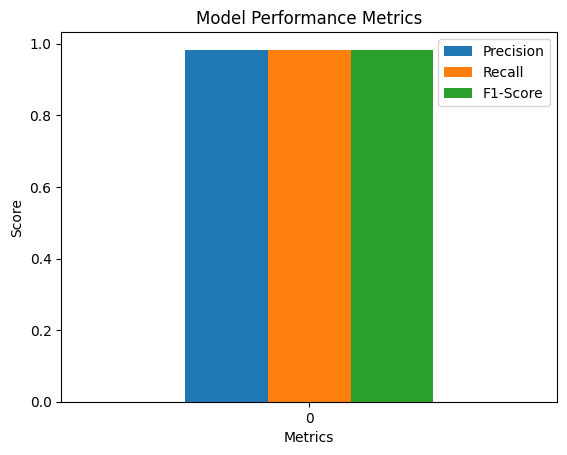

In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import glob
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.utils import class_weight
from sklearn import preprocessing
from keras.utils import to_categorical
from keras import metrics
from collections import Counter
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import tensorflow as tf
from keras.layers import LSTM
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
np.random.seed(0)
tf.random.set_seed(0)
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.optimizers import Adam
import keras

# load all csv files
path = '/content/drive/MyDrive/Data/HRV/1_5'  # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

# Print the number of CSV files used
print('Number of CSV files used:', len(all_files))

# separate into input (X) and output (y) variables
X = df[['RMSSD', 'HF', 'LF']].values
y = df['Label'].values

# encode class values as integers
y = np_utils.to_categorical(y)

# split into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Revert one-hot-encoded y_train back to class labels
y_train_labels = np.argmax(y_train, axis=1)

# calculate class weights
class_weights = class_weight.compute_sample_weight('balanced', y_train_labels)

# Create class weight dictionary
weights = dict(enumerate(class_weights))

# Print the number of samples used
print('Number of samples:', X.shape[0])

# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='tanh', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.05))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.05))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.05))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.05))
model.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.05))
model.add(Dense(3, activation='softmax'))

# compile the keras model
opt = Adam(learning_rate=0.001)#80
# RMSprop optimizer
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001)#91
# Nadam optimizer
opt_nadam = keras.optimizers.Nadam(learning_rate=0.001)#94
# Adadelta optimizer
opt_adadelta = keras.optimizers.Adadelta(learning_rate=1.0)#95

# Adagrad optimizer
opt_adagrad = keras.optimizers.Adagrad(learning_rate=0.01) #91

# Adamax optimizer
opt_adamax = keras.optimizers.Adamax(learning_rate=0.002)#96.55

model.compile(loss='categorical_crossentropy', optimizer=opt_adamax, metrics=['accuracy'])

# define early stopping
es = EarlyStopping(monitor='val_loss', verbose=0.1, patience=5)

# define model checkpointing
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1, callbacks=[es, mc])

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy * 100))

# make class predictions with the model
probabilities = model.predict(X_test)
predictions = np.argmax(probabilities, axis=-1)

# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], np.argmax(y_test[i])))

# confusion matrix
print(confusion_matrix(np.argmax(y_test, axis=1), predictions))

# classification report
print(classification_report(np.argmax(y_test, axis=1), predictions))

# Calculate Precision, Recall, and F1-Score
precision = precision_score(np.argmax(y_test, axis=1), predictions, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), predictions, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), predictions, average='weighted')

print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)
print('F1-Score: %.2f' % f1)

# Plot Precision, Recall, and F1-Score
metrics_df = pd.DataFrame({'Precision': [precision], 'Recall': [recall], 'F1-Score': [f1]})
metrics_df.plot(kind='bar', rot=0)
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.title('Model Performance Metrics')
plt.legend()
plt.show()


Number of CSV files used: 30
Number of samples: 867
Epoch 1/100
43/56 [======================>.......] - ETA: 0s - loss: 0.9948 - accuracy: 0.7023
Epoch 1: val_accuracy improved from -inf to 0.71942, saving model to best_model.h5
56/56 [==============================] - 2s 12ms/step - loss: 0.9850 - accuracy: 0.7004 - val_loss: 0.8508 - val_accuracy: 0.7194
Epoch 2/100
45/56 [=======================>......] - ETA: 0s - loss: 0.8419 - accuracy: 0.7178
Epoch 2: val_accuracy improved from 0.71942 to 0.83453, saving model to best_model.h5
56/56 [==============================] - 0s 6ms/step - loss: 0.8282 - accuracy: 0.7256 - val_loss: 0.7754 - val_accuracy: 0.8345
Epoch 3/100
47/56 [========================>.....] - ETA: 0s - loss: 0.7301 - accuracy: 0.7787
Epoch 3: val_accuracy did not improve from 0.83453
56/56 [==============================] - 0s 5ms/step - loss: 0.7444 - accuracy: 0.7690 - val_loss: 0.7205 - val_accuracy: 0.7194
Epoch 4/100
47/56 [========================>.....] - ET

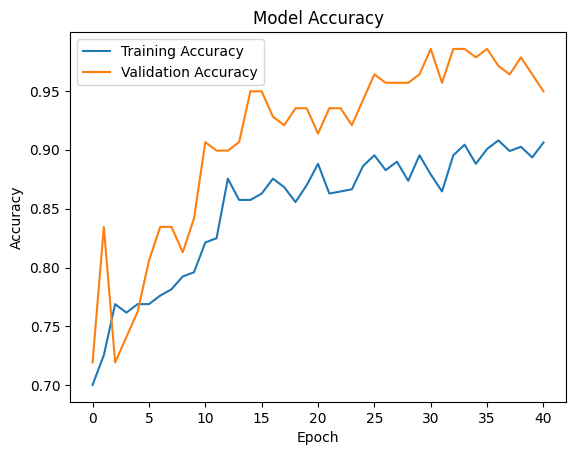

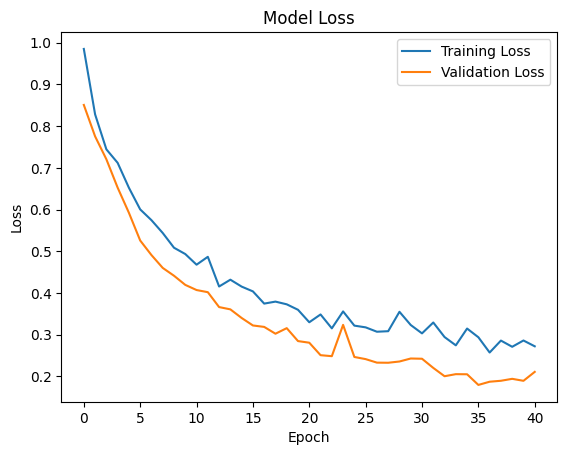

In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import glob
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.utils import class_weight
from sklearn import preprocessing
from keras.utils import to_categorical
from keras import metrics
from collections import Counter
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import tensorflow as tf
from keras.layers import LSTM
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.optimizers import Adam
import keras

# load all csv files
path = '/content/drive/MyDrive/Data/HRV/1_5'  # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

# Print the number of CSV files used
print('Number of CSV files used:', len(all_files))

# separate into input (X) and output (y) variables
X = df[['RMSSD', 'HF', 'LF']].values
y = df['Label'].values

# encode class values as integers
y = np_utils.to_categorical(y)

# split into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Revert one-hot-encoded y_train back to class labels
y_train_labels = np.argmax(y_train, axis=1)

# calculate class weights
class_weights = class_weight.compute_sample_weight('balanced', y_train_labels)

# Create class weight dictionary
weights = dict(enumerate(class_weights))

# Print the number of samples used
print('Number of samples:', X.shape[0])

# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='tanh', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.05))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.05))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.05))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.05))
model.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.05))
model.add(Dense(3, activation='softmax'))

# compile the keras model
opt = Adam(learning_rate=0.001)
# RMSprop optimizer
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001)
# Nadam optimizer
opt_nadam = keras.optimizers.Nadam(learning_rate=0.001)
# Adadelta optimizer
opt_adadelta = keras.optimizers.Adadelta(learning_rate=1.0)

# Adagrad optimizer
opt_adagrad = keras.optimizers.Adagrad(learning_rate=0.01)

# Adamax optimizer
opt_adamax = keras.optimizers.Adamax(learning_rate=0.002)

model.compile(loss='categorical_crossentropy', optimizer=opt_adamax, metrics=['accuracy'])

# define early stopping
es = EarlyStopping(monitor='val_loss', verbose=0.1, patience=5)

# define model checkpointing
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# define metrics tracking
train_accuracy = []
train_loss = []
val_accuracy = []
val_loss = []

# define function to update metrics
def update_metrics(logs):
    train_accuracy.append(logs['accuracy'])
    train_loss.append(logs['loss'])
    val_accuracy.append(logs['val_accuracy'])
    val_loss.append(logs['val_loss'])

# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1, callbacks=[es, mc, tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: update_metrics(logs))])

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy * 100))

# make class predictions with the model
probabilities = model.predict(X_test)
predictions = np.argmax(probabilities, axis=-1)

# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], np.argmax(y_test[i])))

# confusion matrix
print(confusion_matrix(np.argmax(y_test, axis=1), predictions))

# classification report
print(classification_report(np.argmax(y_test, axis=1), predictions))

# Calculate Precision, Recall, and F1-Score
precision = precision_score(np.argmax(y_test, axis=1), predictions, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), predictions, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), predictions, average='weighted')

print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)
print('F1-Score: %.2f' % f1)

# Plot accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
